In [54]:
import requests
import json
import numpy as np
from pprint import pprint
import pandas as pd
from config import client_id
from config import client_auth_key
import matplotlib.pyplot as plt
import gmaps

ModuleNotFoundError: No module named 'gmaps'

In [19]:
url = "https://api.jobspikr.com/sandbox/v1/data"
search_string = {"query_string": {"default_field": "job_title",
                                  "query": "\"Data Scientist\"OR \"Data Engineer\""}}

stjson = json.dumps(search_string)

payload = { "client_id" : client_id,
           "client_auth_key" : client_auth_key,
           "search_query_string" : stjson }

req = requests.get(url, params=payload).json()


job_title=[]
category = []
company_name = []
inferred_city =[]
inferred_state=[]
inferred_country=[]
post_date=[]
job_description=[]
job_type=[]
job_board=[]
uniq_id = []



keys = ["job_title","category","company_name",
        "inferred_city","inferred_state","inferred_country",
        "post_date","job_description","job_type","job_board","uniq_id"]

def append_key_if_present(json, key):
    try:
        key_data = req["job_data"][job][key]
        if key_data == "[]" or key_data == None:
           key_data = "#N/A"
    except KeyError:
        key_data = "#N/A"
    return key_data


Total_jobs = len(req["job_data"])

for job in range(Total_jobs):
    for key in keys:
        key_data = append_key_if_present(job,key)
        if key == keys[0]:
            job_title.append(key_data)
        elif key == keys[1]:
            category.append(key_data)
        elif key == keys[2]:
            company_name.append(key_data)  
        elif key == keys[3]:
            inferred_city.append(key_data)
        elif key == keys[4]:
            inferred_state.append(key_data)
        elif key == keys[5]:
            inferred_country.append(key_data)
        elif key == keys[6]:
            post_date.append(key_data)
        elif key == keys[7]:
            job_description.append(key_data)
        elif key == keys[8]:
            job_type.append(key_data)
        elif key == keys[9]:
            job_board.append(key_data)
        elif key == keys[10]:
            uniq_id.append(key_data)
      
   

In [20]:
jobs_df = pd.DataFrame({"job_title":job_title,
                        "category" :category,
                        "company_name" :company_name,
                        "inferred_city" :inferred_city,
                        'inferred_state' : inferred_state,
                        'inferred_country' : inferred_country,
                        'post_date' :post_date,
                        'job_description':job_description,
                        "job_type":job_type,
                        "job_board" : job_board,
                        "uniq_id" :uniq_id
                        })
jobs_df.to_csv("JobsPikr_API_outputjobs.csv",index = False)
jobs_df.count()

job_title           100
category            100
company_name        100
inferred_city       100
inferred_state      100
inferred_country    100
post_date           100
job_description     100
job_type            100
job_board           100
uniq_id             100
dtype: int64

In [21]:
jobs_df_us = jobs_df.loc[jobs_df["inferred_country"] == "United states"]
jobs_df_us.count()

job_title           31
category            31
company_name        31
inferred_city       31
inferred_state      31
inferred_country    31
post_date           31
job_description     31
job_type            31
job_board           31
uniq_id             31
dtype: int64

In [22]:
Kaggle_data = "../Resource/data_scientist_united_states_job_postings_jobspikr.csv"
Kaggle_data = pd.read_csv(Kaggle_data)

# Combine the data into a single dataset
combined_results_df = pd.merge(Kaggle_data,jobs_df_us,on="uniq_id",how= "outer")

combined_results_df.to_csv("combined_outputjobs.csv",index = False)
combined_results_df.head()   

,crawl_timestamp,url,job_title_x,category_x,company_name_x,city,state,country,inferred_city_x,inferred_state_x,...,job_title_y,category_y,company_name_y,inferred_city_y,inferred_state_y,inferred_country_y,post_date_y,job_description_y,job_type_y,job_board_y
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
combined_results_df["job_title_x"] = combined_results_df["job_title_x"].fillna(combined_results_df["job_title_y"])
combined_results_df["category_x"] = combined_results_df["category_x"].fillna(combined_results_df["category_y"])
combined_results_df["company_name_x"] = combined_results_df["company_name_x"].fillna(combined_results_df["company_name_y"])
combined_results_df["inferred_city_x"] = combined_results_df["inferred_city_x"].fillna(combined_results_df["inferred_city_y"])
combined_results_df["inferred_state_x"] = combined_results_df["inferred_state_x"].fillna(combined_results_df["inferred_state_y"])
combined_results_df["inferred_country_x"] = combined_results_df["inferred_country_x"].fillna(combined_results_df["inferred_country_y"])
combined_results_df["post_date_x"] = combined_results_df["post_date_x"].fillna(combined_results_df["post_date_y"])
combined_results_df["job_description_x"] = combined_results_df["job_description_x"].fillna(combined_results_df["job_description_y"])
combined_results_df["job_type_x"] = combined_results_df["job_type_x"].fillna(combined_results_df["job_type_y"])
combined_results_df["job_board_x"] = combined_results_df["job_board_x"].fillna(combined_results_df["job_board_y"])



In [25]:

combined_results_df = combined_results_df[["job_title_x","category_x","company_name_x","inferred_city_x",
                                                   "inferred_state_x","inferred_country_x",
                                                   "post_date_x","job_type_x",
                                                   "job_board_x","uniq_id"]]

combined_results_df.rename(columns={"job_title_x": "job_title", "category_x": "category", 
                                    "company_name_x": "company_name",
                                    "inferred_city_x":"inferred_city",
                                    "inferred_state_x":"inferred_state",
                                    "inferred_country_x":"inferred_country",
                                    "post_date_x":"post_date",
                                    "job_type_x":"job_type",
                                    "job_board_x":"job_board"}, inplace = True)

combined_results_df.head()

C:\Users\sroba\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,job_title,category,company_name,inferred_city,inferred_state,inferred_country,post_date,job_type,job_board,uniq_id
0,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland hills,California,Usa,2019-02-06,Undefined,indeed,3b6c6acfcba6135a31c83bd7ea493b18
1,Data Scientist,NaN,Luxoft USA Inc,Middletown,New jersey,Usa,2019-02-05,Undefined,dice,741727428839ae7ada852eebef29b0fe
2,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New york,New york,Usa,2019-02-05,Full Time,dice,cdc9ef9a1de327ccdc19cc0d07dbbb37
3,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New york,New york,Usa,2019-02-06,Undefined,indeed,1c8541cd2c2c924f9391c7d3f526f64e
4,Senior Data Scientist,biotech,CyberCoders,Charlotte,North carolina,Usa,2019-02-05,Full Time,monster,445652a560a5441060857853cf267470


In [26]:
combined_results_df["job_title"].value_counts()

Data Scientist                                            2890
Senior Data Scientist                                      644
Sr. Data Scientist                                         203
Lead Data Scientist                                        179
Principal Data Scientist                                   148
                                                          ... 
Sr. Data Scientist, Real - time Bidding                      1
Retail Data Analyst/Data Scientist                           1
Statistical Researcher/ Data Scientist 2                     1
Chubb Global Risk Advisors\: Data Scientist Consultant       1
Sr. Staff Data Scientist in Lake Forest, CA                  1
Name: job_title, Length: 2764, dtype: int64

In [27]:
###### This set of code needs to be finalized on the "combined_results_df" DataFrame and for all different job titles.

combined_results_df["job_title"] = combined_results_df["job_title"].fillna("unknown")

combined_results_df["Job_title_final"] = ''

for index,row in combined_results_df.iterrows():
    if "Data Scientist" in row["job_title"]:
        x=row["job_title"]
        if "Sr." in x:
            row["Job_title_final"] = "Senior Data Scientist"
        elif "Senior" in x:
            row["Job_title_final"] = "Senior Data Scientist"
        elif "Principal" in x:
            row["Job_title_final"] = "Principal Data Scientist"
        elif "Junior" in x:
            row["Job_title_final"] = "Junior Data Scientist"
        else:
            row["Job_title_final"] = "Data Scientist"
    elif "Data Engineer" in row["job_title"]:
        x=row["job_title"]
        if "Sr." in x:
            row["Job_title_final"] = "Senior Data Engineer"
        elif "Senior" in x:
            row["Job_title_final"] = "Senior Data Engineer"
        elif "Junior" in x:
            row["Job_title_final"] = "Junior Data Engineer"
        else:
            row["Job_title_final"] = "Data Engineer"
    elif "Data Analyst" in row["job_title"]:
        x=row["job_title"]
        if "Sr." in x:
            row["Job_title_final"] = "Senior Data Analyst"
        elif "Senior" in x:
            row["Job_title_final"] = "Senior Data Analyst"
        else:
            row["Job_title_final"] = "Data Analyst"
    else:
            row["Job_title_final"] = "Unknown"
            
print(combined_results_df["Job_title_final"].value_counts())

C:\Users\sroba\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sroba\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Data Scientist              7302
Senior Data Scientist       1988
Principal Data Scientist     382
Unknown                      220
Junior Data Scientist        112
Data Engineer                  7
Senior Data Engineer           2
Name: Job_title_final, dtype: int64


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

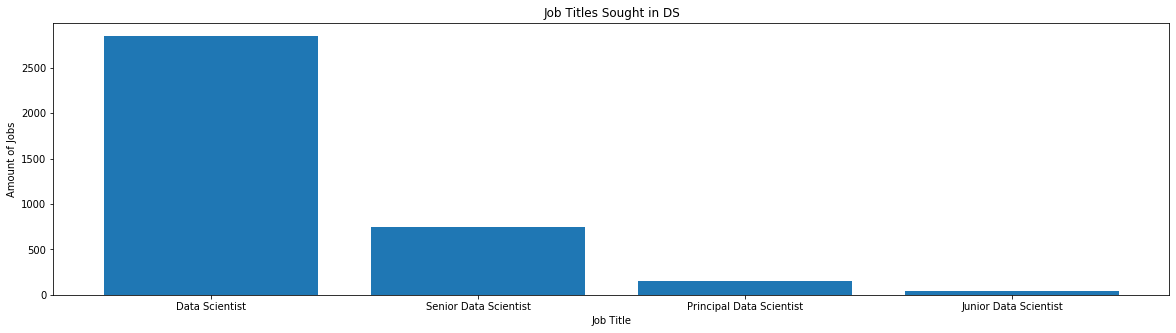

In [35]:
combined_results_df = combined_results_df[~combined_results_df.Job_title_final.str.contains("Unknown")]
combined_results_df = combined_results_df[~combined_results_df.Job_title_final.str.contains("Senior Data Engineer")]
combined_results_df = combined_results_df[~combined_results_df.Job_title_final.str.contains("Data Engineer")]
val_counts = combined_results_df["Job_title_final"].value_counts()

plt.figure(figsize = (20,5))
plt.bar(val_counts.index.values, val_counts.values)

plt.title("Job Titles Sought in DS")
plt.xlabel("Job Title")
plt.ylabel('Amount of Jobs')
plt.xticks(rotation=0)

In [13]:
combined_results_df["job_type"].value_counts()

Undefined     5978
Full Time     3322
Contract       476
Part Time        6
Internship       2
Name: job_type, dtype: int64

Text(0.5, 1.0, 'Job Roles Sought in DS')

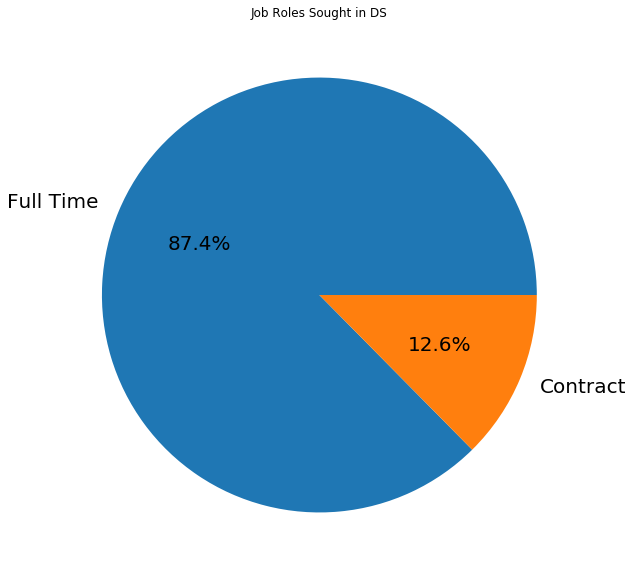

In [28]:
combined_results_df = combined_results_df[~combined_results_df.job_type.str.contains("Undefined")]
combined_results_df = combined_results_df[~combined_results_df.job_type.str.contains("Part Time")]
combined_results_df = combined_results_df[~combined_results_df.job_type.str.contains("Internship")]
role_val_counts = combined_results_df["job_type"].value_counts()

plt.figure(figsize = (10,10))
plt.pie(role_val_counts.values, labels = role_val_counts.index.values, autopct="%1.1f%%", textprops = {'fontsize': 20})

plt.title("Job Roles Sought in DS")

In [15]:
combined_results_df['Qtr'] = pd.to_datetime(combined_results_df['post_date'].values, format='%Y-%m').astype('period[Q]')
combined_results_df.head()

combined_results_df['Qtr'].value_counts()

2019Q3    1993
2019Q2    1066
2019Q1     737
2018Q4       1
2018Q3       1
Freq: Q-DEC, Name: Qtr, dtype: int64

Text(0.5, 1.0, 'Number of Jobs Posted in 2019')

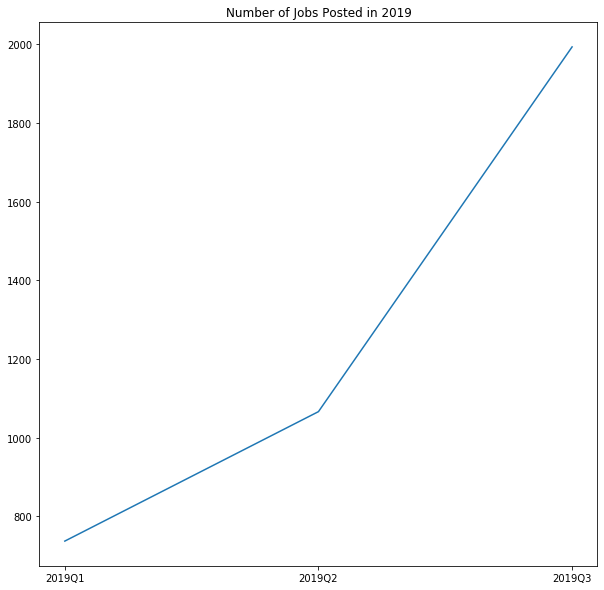

In [16]:
combined_results_df["Qtr"] = combined_results_df["Qtr"].astype(str)
combined_results_df = combined_results_df[~combined_results_df["Qtr"].str.contains("2018")]
qtr_val_counts = combined_results_df["Qtr"].value_counts()

x = qtr_val_counts.index
y = qtr_val_counts.values

x, y = zip(*sorted(zip(x, y)))

plt.figure(figsize = (10,10))
plt.plot(x, y)

plt.title("Number of Jobs Posted in 2019")

In [36]:
#Job count by State
Job_results_grouped_by_state = combined_results_df.groupby(["inferred_state"])["uniq_id"].count()

Job_results_sorted = Job_results_grouped_by_state.sort_values(ascending= False)
Job_results_sorted

inferred_state
California              671
Texas                   284
Massachusetts           279
New york                269
Illinois                227
Virginia                217
New jersey              179
North carolina          139
Georgia                 125
Washington              125
Pennsylvania            121
Florida                 108
Michigan                 99
Maryland                 89
Connecticut              76
Ohio                     73
Colorado                 52
New mexico               45
District of columbia     44
Arizona                  36
Missouri                 31
Washington d.c.          30
Wisconsin                29
Minnesota                29
Tennessee                25
Indiana                  19
Oregon                   15
Nevada                   14
Utah                     14
South carolina           11
Oklahoma                 11
Arkansas                 11
Louisiana                 7
Rhode island              6
Alabama                   6
New h

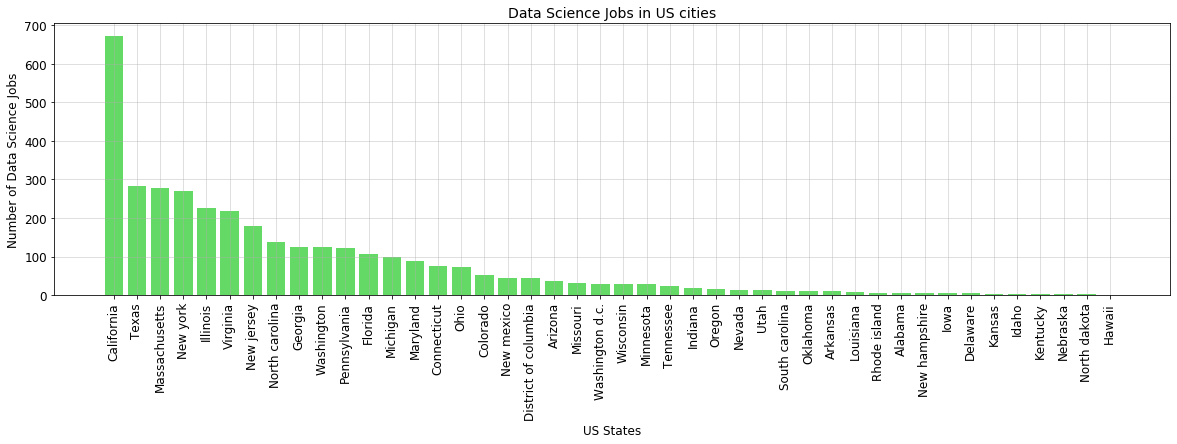

In [37]:
# Bar Graph comparing Number of Data Science jobs in US states

plt.figure(figsize=(20,5))

color = 'limegreen'
Plot_Data = plt.bar(Job_results_sorted.index,Job_results_sorted,alpha=0.75,color = color)

plt.xticks(rotation="90",fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel('US States',fontsize = 12)
plt.ylabel("Number of Data Science Jobs",fontsize = 12)
plt.title("Data Science Jobs in US cities",fontsize = 14)
plt.grid(alpha = 0.5)
plt.savefig('Data Science Jobs in US cities - Desc order.png')

plt.show()

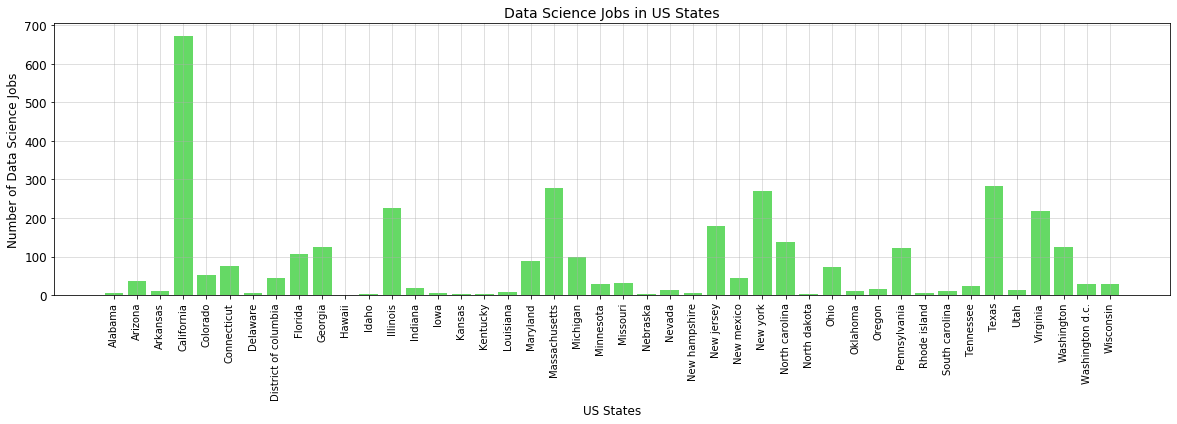

In [38]:
# Bar Graph comparing Number of Data Science jobs in US states
plt.figure(figsize=(20,5))

color = 'limegreen'

Plot_Data = plt.bar(Job_results_grouped_by_state.index,Job_results_grouped_by_state,alpha=0.75,color = color)

plt.xticks(rotation="90",fontsize = 10)
plt.yticks(fontsize = 12)

plt.xlabel('US States',fontsize = 12)
plt.ylabel("Number of Data Science Jobs",fontsize = 12)
plt.title("Data Science Jobs in US States",fontsize = 14)

plt.grid(alpha = 0.5)

plt.savefig('Data Science Jobs in US States.png')
plt.show()

In [39]:
#Creating a new column in data Frame that concatenates city and country
combined_results_df["City_State_Cntry"] = ''

for index,row in combined_results_df.iterrows():
    row["City_State_Cntry"] = str(row["inferred_city"]) + str(",") + "US"

cities_list = combined_results_df["City_State_Cntry"].unique()

In [40]:
#OpenWeather API request to retrive lat and lng from the cities
base_url = "http://api.openweathermap.org/data/2.5/weather?"


lat = []
lng = []
cities = []

record = 0

for city in cities_list:  
    try: 
        
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        lng.append(weather_json["coord"]["lon"])
        cities.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
       
        record= record + 1
        if record == 50:
            time.sleep(70)
            record = 0

       
    except:
        continue

print(len(lat))
print(len(lng))
print(len(cities))

0
0
0


In [41]:
#creating a Data Frame with city, lat and lng values retrievd from openweathermap API
cities_df = pd.DataFrame({"city":cities,
                        "lat":lat,
                        "lng":lng})

In [42]:
#Configure gmaps
gmaps.configure(api_key=g_key)
# Store latitude and longitude in locations
locations = cities_df[["lat", "lng"]]

NameError: name 'gmaps' is not defined

In [43]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations,dissipating=True, max_intensity=10)

# Display figure
fig = gmaps.figure(center=(40,-105), zoom_level=4)

# Add layer
fig.add_layer(heat_layer)

# Display

fig

NameError: name 'gmaps' is not defined

In [ ]:
#Indeed Dataset

In [45]:
file_salary = "../Resource/indeed_job_dataset.csv"

In [46]:
salary_df = pd.read_csv(file_salary)
salary_df.head()


,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services


In [47]:

salary_df.columns

salary_df = salary_df[['Job_Title','Queried_Salary','Job_Type','Skill','Company',
                                  'Location','Company_Industry']]
salary_df


,Job_Title,Queried_Salary,Job_Type,Skill,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",Federal Reserve Bank of Dallas,TX,Banks and Financial Services
...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",Intelliswift Software Inc,NaN,NaN
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",Jobspring Partners,CA,Human Resources and Staffing
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",JPMorgan Chase,DE,Banks and Financial Services
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",Capital One,NY,Banks and Financial Services


In [48]:
salary_df.count() 


Job_Title           5715
Queried_Salary      5715
Job_Type            5715
Skill               5483
Company             5611
Location            5463
Company_Industry    3826
dtype: int64

In [55]:

salary_df['Skill'].replace('', np.nan, inplace=True)
salary_df['Company'].replace('', np.nan, inplace=True)
salary_df['Location'].replace('', np.nan, inplace=True)


In [56]:

salary_df.dropna(subset=['Skill','Location','Company'], inplace=True)


In [57]:

salary_df['Company_Industry'].isnull().sum()


0

In [58]:
salary_df['Company_Industry'].fillna('Missln', inplace=True)

In [59]:
salary_df.count()

Job_Title           5166
Queried_Salary      5166
Job_Type            5166
Skill               5166
Company             5166
Location            5166
Company_Industry    5166
dtype: int64

In [60]:
salary_df["Job_Title"].value_counts()

Data Scientist                                          696
Data Analyst                                            378
Data Engineer                                           289
Senior Data Scientist                                   203
Senior Data Engineer                                    109
                                                       ... 
Data Analyst - Automotive Retail                          1
Associate Principal Engineer- Data Engineer               1
Financial Wellness Data Scientist                         1
Business Data Analyst - Senior Consultant - National      1
Data Scientist - Innovation                               1
Name: Job_Title, Length: 2149, dtype: int64

In [61]:
salary_df = salary_df.replace(
    {"Industrial ManufacturingAgriculture and Extraction": "Industrial Manufacturing",
     "Industrial ManufacturingConstruction": "Industrial Manufacturing",
     "Industrial ManufacturingConsumer Goods and Services": "Industrial Manufacturing", 
     "Real EstateReal Estate": "Real Estate",
     "Restaurants, Travel and LeisureConsulting and Business Services": "Restaurants, Travel and Leisure",
     "Food and BeveragesConsulting and Business Services": "Food and Beverages",
     "RetailConsumer Goods and Services": "Consumer Goods and Services","InsuranceHealth Care": "Insurance",
    
    })
salary_df["Company_Industry"].value_counts()
sal_df = salary_df[~salary_df.Company_Industry.str.contains("Missln")]


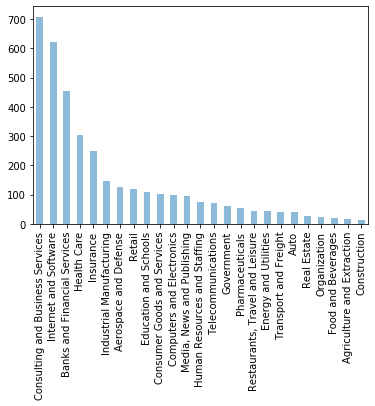

In [62]:

sal_df["Company_Industry"].value_counts().plot(kind="bar",alpha=0.5, align="center")

In [65]:
skills = ['Python','SQL','Machine Learning',"R",'Hadoop',"Tableau",'SPSS','Data Mining','JavaScript','Java']
num_jobs= []
def get_skills(skill):
    
    skill_counter=0

    for index,row in salary_df.iterrows():
    
        if skill in row["Skill"]:
            skill_counter += 1       
    
           # print(skill)
    
    return skill_counter

counter=0

total_skills = len(skills)


for skill in skills:
    
    counter_curr=counter+get_skills(skill)
    counter=0
    
    num_jobs.append(counter_curr)
    
print(num_jobs)


[3089, 3222, 2228, 2508, 1538, 1193, 278, 1046, 276, 1458]


(-1.1174835688324598,
 1.1131548918029401,
 -1.114445104031732,
 1.1022754918573723)

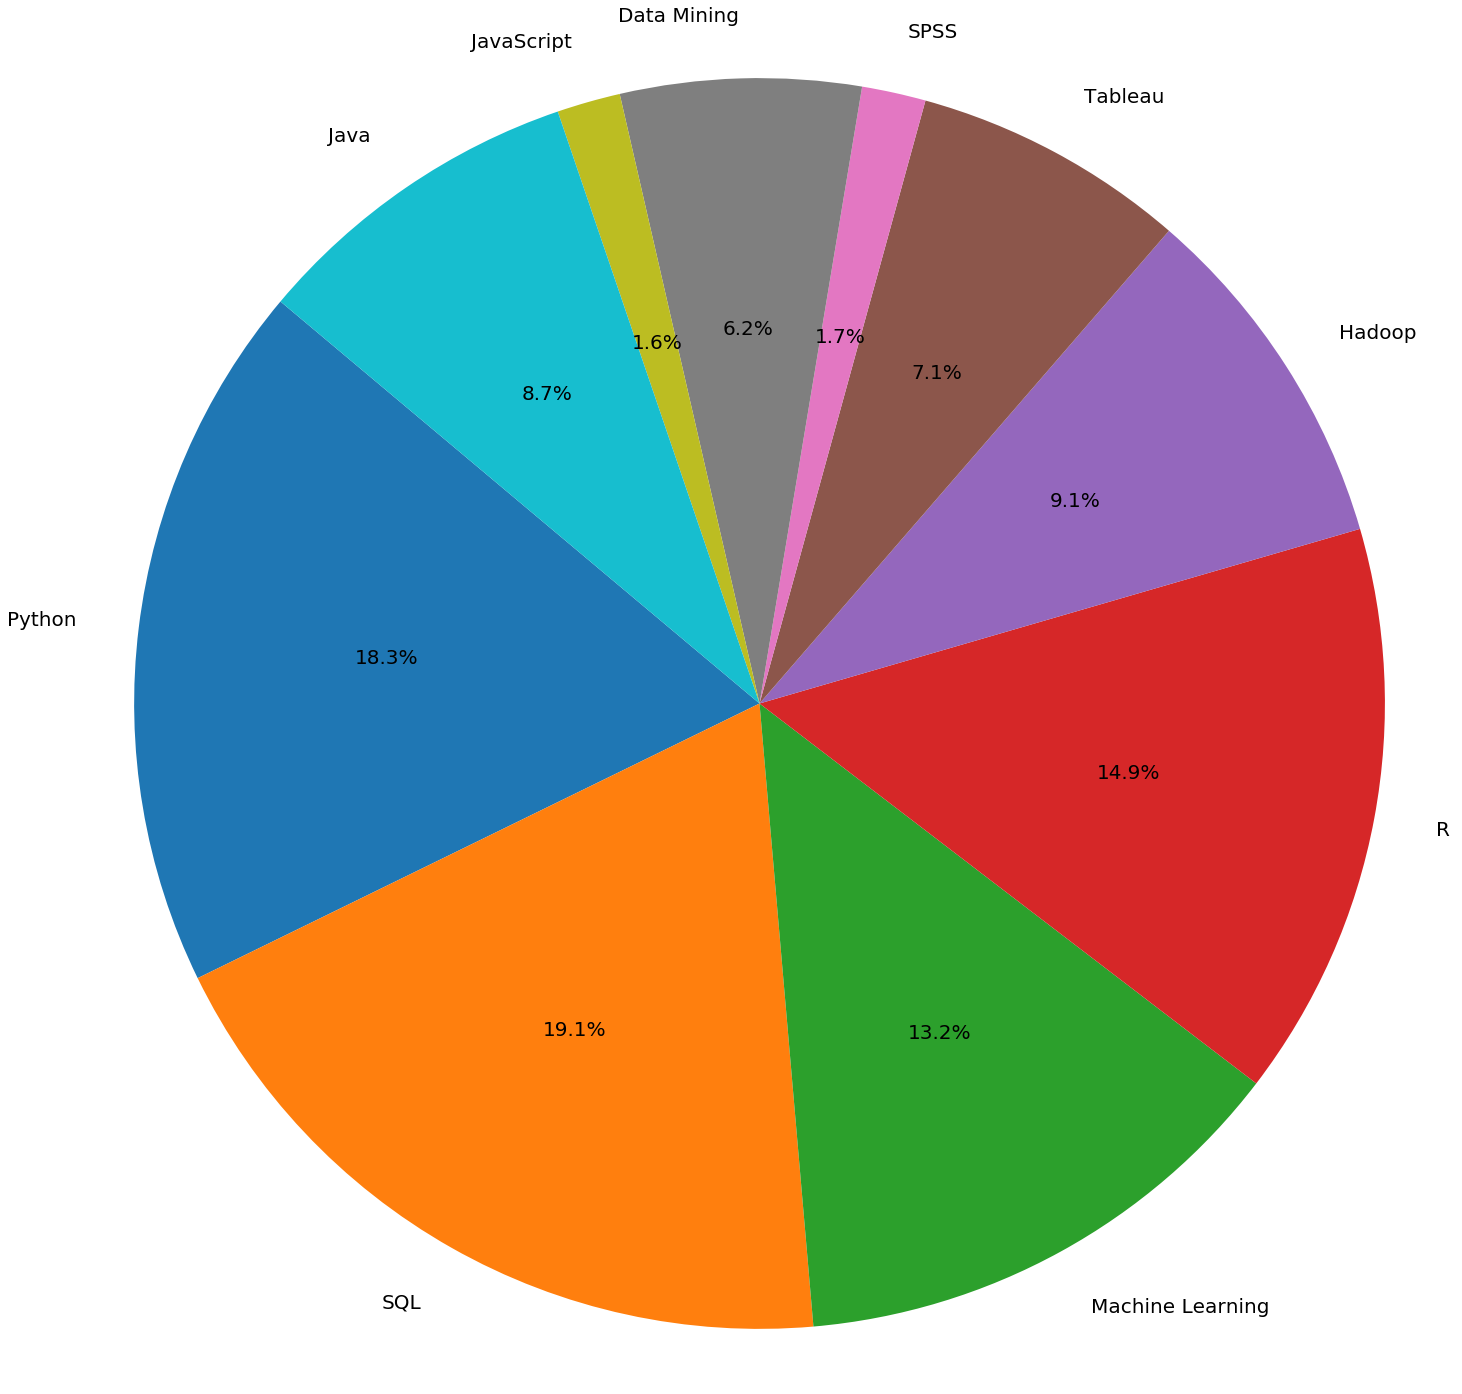

In [67]:
skill_set = ['Python','SQL','Machine Learning',"R",'Hadoop',"Tableau",'SPSS','Data Mining','JavaScript','Java']

plt.figure(figsize=(25,25))
plt.pie(num_jobs, labels=skill_set, autopct="%1.1f%%", shadow=False, startangle=140,textprops={'fontsize': 20})
# Create axes which are equal so we have a perfect circle

plt.axis("equal")

Text(0, 0.5, 'Number of Data Science Jobs')

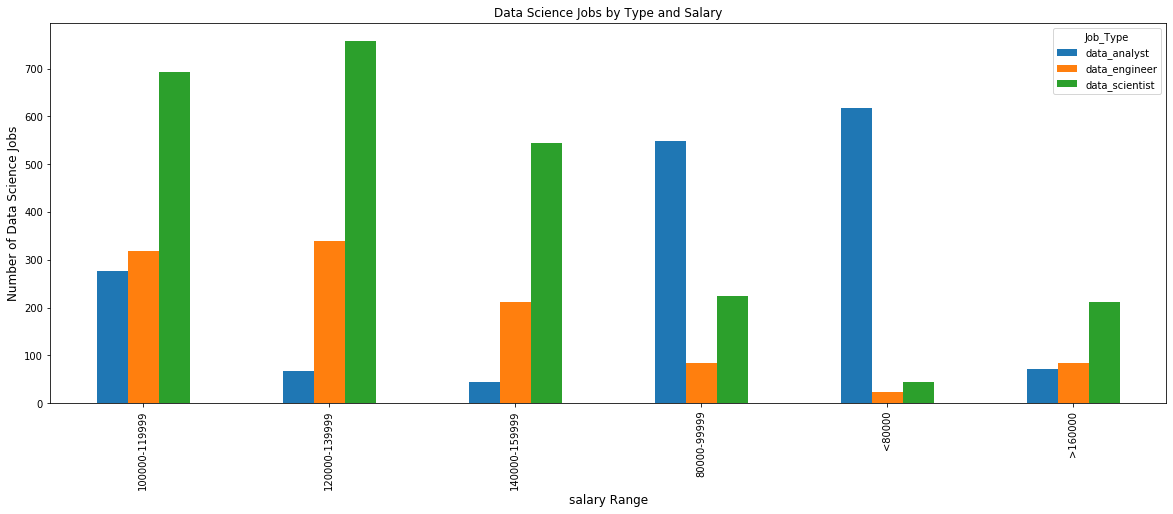

In [68]:

salary_bar=salary_df.groupby("Job_Type").Queried_Salary.value_counts()


plotbar=salary_bar.unstack(0).plot(kind="bar",figsize=(20,7),title="Data Science Jobs by Type and Salary")
plotbar.set_xlabel('salary Range',fontsize = 12)
plotbar.set_ylabel("Number of Data Science Jobs",fontsize = 12)
#plotbar.grid(alpha = 0.5)
#plotbar.savefig('Data Science Jobs by Type and Salary Range.png')
